In [1]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('mnist/', one_hot = True)

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting mnist/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting mnist/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting mnist/t10k-images-idx3-ubyte.gz
Extracting mnist/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [30]:
tf.reset_default_graph()

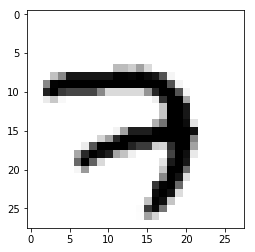

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(mnist.train.images[0].reshape(28,28), cmap = 'Greys')

In [89]:
mnist.train.images[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

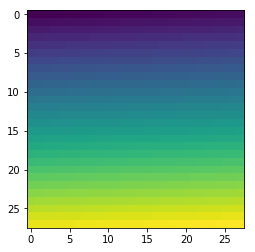

In [4]:
import numpy as np
imagem1 = np.arange(0,784).reshape(28,28)
plt.imshow(imagem1)

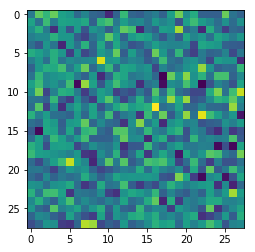

In [91]:
imagem2 = np.random.normal(size = 784).reshape(28,28)
plt.imshow(imagem2)

In [31]:
ruido_ph = tf.placeholder(tf.float32, [None, 100])

In [32]:
def gerador(ruido, reuse = None):
    with tf.variable_scope('gerador', reuse = reuse):
        # 100 -> 128 -> 128 -> 784
        camada_oculta1 = tf.nn.relu(tf.layers.dense(inputs = ruido, units = 128))
        camada_oculta2 = tf.nn.relu(tf.layers.dense(inputs = camada_oculta1, units = 128))
        camada_saida = tf.layers.dense(inputs = camada_oculta2, units = 784, activation = tf.nn.tanh)
        return camada_saida

In [33]:
imagens_reais_ph = tf.placeholder(tf.float32, [None, 784])

In [34]:
def discriminador(X, reuse = None):
    with tf.variable_scope('discriminador', reuse = reuse):
        # 784 -> 128 -> 128 -> 1
        camada_oculta1 = tf.nn.relu(tf.layers.dense(inputs = X, units = 128))
        camada_oculta2 = tf.nn.relu(tf.layers.dense(inputs = camada_oculta1, units = 128))
        logits = tf.layers.dense(camada_oculta2, units = 1)
        return logits

In [35]:
logits_imagens_reais = discriminador(imagens_reais_ph)
logits_imagens_ruido = discriminador(gerador(ruido_ph), reuse = True)

erro_discriminador_real = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits = logits_imagens_reais,
                                                                                labels = tf.ones_like(logits_imagens_reais) * (0.9)))
erro_discriminador_ruido = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits = logits_imagens_ruido,
                                                                                 labels = tf.zeros_like(logits_imagens_ruido)))
erro_discriminador = erro_discriminador_real + erro_discriminador_ruido

erro_gerador = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits = logits_imagens_ruido,
                                                                     labels = tf.ones_like(logits_imagens_ruido)))


In [36]:
variaveis = tf.trainable_variables()
variaveis

[<tf.Variable 'discriminador/dense/kernel:0' shape=(784, 128) dtype=float32_ref>,
 <tf.Variable 'discriminador/dense/bias:0' shape=(128,) dtype=float32_ref>,
 <tf.Variable 'discriminador/dense_1/kernel:0' shape=(128, 128) dtype=float32_ref>,
 <tf.Variable 'discriminador/dense_1/bias:0' shape=(128,) dtype=float32_ref>,
 <tf.Variable 'discriminador/dense_2/kernel:0' shape=(128, 1) dtype=float32_ref>,
 <tf.Variable 'discriminador/dense_2/bias:0' shape=(1,) dtype=float32_ref>,
 <tf.Variable 'gerador/dense/kernel:0' shape=(100, 128) dtype=float32_ref>,
 <tf.Variable 'gerador/dense/bias:0' shape=(128,) dtype=float32_ref>,
 <tf.Variable 'gerador/dense_1/kernel:0' shape=(128, 128) dtype=float32_ref>,
 <tf.Variable 'gerador/dense_1/bias:0' shape=(128,) dtype=float32_ref>,
 <tf.Variable 'gerador/dense_2/kernel:0' shape=(128, 784) dtype=float32_ref>,
 <tf.Variable 'gerador/dense_2/bias:0' shape=(784,) dtype=float32_ref>]

In [37]:
variaveis_discriminador = [v for v in variaveis if 'discriminador' in v.name]
print([v.name for v in variaveis_discriminador])

['discriminador/dense/kernel:0', 'discriminador/dense/bias:0', 'discriminador/dense_1/kernel:0', 'discriminador/dense_1/bias:0', 'discriminador/dense_2/kernel:0', 'discriminador/dense_2/bias:0']


In [38]:
variaveis_gerador = [v for v in variaveis if 'gerador' in v.name]
print([v.name for v in variaveis_gerador])

['gerador/dense/kernel:0', 'gerador/dense/bias:0', 'gerador/dense_1/kernel:0', 'gerador/dense_1/bias:0', 'gerador/dense_2/kernel:0', 'gerador/dense_2/bias:0']


In [39]:
treinamento_discriminador = tf.train.AdamOptimizer(learning_rate = 0.001).minimize(erro_discriminador,
                                                                                  var_list = variaveis_discriminador)
treinamento_gerador = tf.train.AdamOptimizer(learning_rate = 0.001).minimize(erro_gerador,
                                                                            var_list = variaveis_gerador)

In [40]:
%%time
batch_size = 100
amostras_teste = []
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    #ruido_teste = np.random.uniform(-1, 1, size = (1,100))
    #amostra = sess.run(gerador(ruido_ph, True), feed_dict = {ruido_ph: ruido_teste})
    
    #batch = mnist.train.next_batch(100)
    #imagens_batch = batch[0].reshape((100, 784))
    #imagens_batch = imagens_batch * 2 - 1
    #r = sess.run(discriminador(imagens_reais_ph, True), feed_dict = {imagens_reais_ph: imagens_batch})
    #r2 = sess.run(tf.nn.sigmoid(r))
    #ex = tf.constant([[1,2],[3,4]])
    #print(sess.run(tf.ones_like(ex)))
    
    for epoca in range(1000):
        numero_batches = mnist.train.num_examples // batch_size
        for i in range(numero_batches):
            batch = mnist.train.next_batch(batch_size)
            imagens_batch = batch[0].reshape((100, 784))
            imagens_batch = imagens_batch * 2 - 1
            
            batch_ruido = np.random.uniform(-1, 1, size = (batch_size, 100))
            
            _, custod = sess.run([treinamento_discriminador, erro_discriminador], 
                                 feed_dict = {imagens_reais_ph: imagens_batch, ruido_ph: batch_ruido})
            _, custog = sess.run([treinamento_gerador, erro_gerador], feed_dict = {ruido_ph: batch_ruido})
            
        print('época: ' + str(epoca + 1) + ' erro D: ' + str(custod) + ' erro G: ' + str(custog))
        
        ruido_teste = np.random.uniform(-1, 1, size = (1, 100))
        imagem_gerada = sess.run(gerador(ruido_ph, reuse = True), feed_dict = {ruido_ph: ruido_teste})
        amostras_teste.append(imagem_gerada)
            
            

época: 1 erro D: 0.521544 erro G: 3.6679425
época: 2 erro D: 0.64974934 erro G: 5.294145
época: 3 erro D: 0.4364342 erro G: 4.1649156
época: 4 erro D: 1.0732461 erro G: 11.804414
época: 5 erro D: 0.98733366 erro G: 6.1363373
época: 6 erro D: 0.6725583 erro G: 3.2001336
época: 7 erro D: 0.5413002 erro G: 4.2603493
época: 8 erro D: 0.8046322 erro G: 4.6411138
época: 9 erro D: 0.9566247 erro G: 3.5391781
época: 10 erro D: 0.6428788 erro G: 2.6432014
época: 11 erro D: 1.2068607 erro G: 1.6410621
época: 12 erro D: 1.4378519 erro G: 2.3634422
época: 13 erro D: 1.356884 erro G: 2.3771245
época: 14 erro D: 1.5171741 erro G: 2.489578
época: 15 erro D: 1.303392 erro G: 1.6581588
época: 16 erro D: 0.6817667 erro G: 5.1870136
época: 17 erro D: 0.6578166 erro G: 2.3596032
época: 18 erro D: 1.6820958 erro G: 1.6595203
época: 19 erro D: 2.103841 erro G: 2.3661187
época: 20 erro D: 1.2992451 erro G: 1.007956
época: 21 erro D: 1.6648474 erro G: 1.6363186
época: 22 erro D: 0.63844776 erro G: 3.376312
ép

época: 179 erro D: 1.0553764 erro G: 1.314904
época: 180 erro D: 1.1303093 erro G: 1.3395243
época: 181 erro D: 1.164223 erro G: 1.3013299
época: 182 erro D: 1.1624811 erro G: 1.337835
época: 183 erro D: 1.3814209 erro G: 1.1108323
época: 184 erro D: 1.1787783 erro G: 1.1502768
época: 185 erro D: 1.1369762 erro G: 1.434378
época: 186 erro D: 1.1942337 erro G: 1.2213546
época: 187 erro D: 1.2345847 erro G: 1.2256258
época: 188 erro D: 1.1748668 erro G: 1.1322311
época: 189 erro D: 1.0327096 erro G: 1.3751401
época: 190 erro D: 1.2778058 erro G: 1.0268664
época: 191 erro D: 1.0918442 erro G: 1.3184333
época: 192 erro D: 1.1338427 erro G: 1.4250882
época: 193 erro D: 1.2723291 erro G: 1.3268787
época: 194 erro D: 1.2184417 erro G: 1.2002269
época: 195 erro D: 1.3204501 erro G: 1.151915
época: 196 erro D: 1.193265 erro G: 1.2070793
época: 197 erro D: 1.273283 erro G: 1.1078572
época: 198 erro D: 1.2400755 erro G: 1.0600784
época: 199 erro D: 1.2683153 erro G: 1.1777798
época: 200 erro D: 1

época: 355 erro D: 0.94616246 erro G: 1.9768512
época: 356 erro D: 1.1595212 erro G: 1.0458438
época: 357 erro D: 1.3028216 erro G: 0.8818014
época: 358 erro D: 1.329664 erro G: 0.9668367
época: 359 erro D: 1.3402703 erro G: 0.92433494
época: 360 erro D: 1.2670034 erro G: 0.94684035
época: 361 erro D: 1.3094927 erro G: 0.9539177
época: 362 erro D: 1.3002765 erro G: 0.92339456
época: 363 erro D: 1.3806037 erro G: 0.9181854
época: 364 erro D: 1.4178753 erro G: 0.86895716
época: 365 erro D: 1.5787258 erro G: 0.82347035
época: 366 erro D: 1.3175437 erro G: 1.0027037
época: 367 erro D: 1.2588503 erro G: 1.117615
época: 368 erro D: 1.4057727 erro G: 0.9561478
época: 369 erro D: 1.3076361 erro G: 0.9876371
época: 370 erro D: 1.26202 erro G: 1.0297556
época: 371 erro D: 1.2363644 erro G: 1.0270361
época: 372 erro D: 1.2103804 erro G: 1.0671072
época: 373 erro D: 1.3083742 erro G: 1.016835
época: 374 erro D: 1.0264199 erro G: 1.5140096
época: 375 erro D: 1.274303 erro G: 1.1307902
época: 376 er

época: 530 erro D: 1.2838423 erro G: 0.9073687
época: 531 erro D: 1.2627971 erro G: 1.0769783
época: 532 erro D: 0.9221658 erro G: 1.8493744
época: 533 erro D: 1.2889131 erro G: 1.0588746
época: 534 erro D: 1.264323 erro G: 1.0986838
época: 535 erro D: 1.2289016 erro G: 1.1873066
época: 536 erro D: 1.3774515 erro G: 4.438987
época: 537 erro D: 1.1901915 erro G: 1.1259481
época: 538 erro D: 1.3033931 erro G: 1.0358472
época: 539 erro D: 1.2636262 erro G: 1.1130215
época: 540 erro D: 1.5324837 erro G: 0.9061322
época: 541 erro D: 1.2969368 erro G: 0.94336313
época: 542 erro D: 1.2399237 erro G: 0.9396577
época: 543 erro D: 1.3180228 erro G: 0.93566626
época: 544 erro D: 1.3404253 erro G: 0.91711235
época: 545 erro D: 1.211102 erro G: 1.0906597
época: 546 erro D: 0.9517325 erro G: 1.8128059
época: 547 erro D: 1.3557987 erro G: 0.9317739
época: 548 erro D: 1.3574136 erro G: 0.98921317
época: 549 erro D: 1.1958795 erro G: 0.92590934
época: 550 erro D: 1.273591 erro G: 0.975262
época: 551 er

época: 705 erro D: 1.3376987 erro G: 0.84206843
época: 706 erro D: 1.2499927 erro G: 0.9456849
época: 707 erro D: 1.260246 erro G: 1.1171522
época: 708 erro D: 1.2954471 erro G: 1.0123767
época: 709 erro D: 1.3570892 erro G: 0.83971924
época: 710 erro D: 1.3363361 erro G: 0.8989788
época: 711 erro D: 1.3370017 erro G: 0.86508775
época: 712 erro D: 1.3110129 erro G: 1.3018506
época: 713 erro D: 1.3101836 erro G: 0.9091987
época: 714 erro D: 1.304369 erro G: 0.8709869
época: 715 erro D: 1.2196563 erro G: 1.0692394
época: 716 erro D: 1.2827005 erro G: 0.99445635
época: 717 erro D: 1.2440792 erro G: 1.3893262
época: 718 erro D: 1.1960406 erro G: 0.9227333
época: 719 erro D: 1.4085753 erro G: 0.7816737
época: 720 erro D: 1.287751 erro G: 0.9101703
época: 721 erro D: 1.34974 erro G: 0.95266515
época: 722 erro D: 1.1482387 erro G: 1.4072822
época: 723 erro D: 1.2999752 erro G: 0.894095
época: 724 erro D: 1.3630173 erro G: 0.8022603
época: 725 erro D: 1.2982354 erro G: 0.96785516
época: 726 er

época: 880 erro D: 1.3425936 erro G: 0.8196662
época: 881 erro D: 1.2977962 erro G: 0.81597
época: 882 erro D: 1.3245099 erro G: 1.059758
época: 883 erro D: 1.36766 erro G: 0.83340394
época: 884 erro D: 1.3206055 erro G: 0.8590872
época: 885 erro D: 1.3544216 erro G: 0.8032915
época: 886 erro D: 1.3083742 erro G: 0.8405614
época: 887 erro D: 1.3264334 erro G: 0.8296331
época: 888 erro D: 1.1676393 erro G: 1.2271903
época: 889 erro D: 1.2464523 erro G: 0.9512204
época: 890 erro D: 1.2326226 erro G: 1.0674801
época: 891 erro D: 1.46701 erro G: 1.1744514
época: 892 erro D: 1.3764627 erro G: 0.8933761
época: 893 erro D: 1.3067101 erro G: 0.8434167
época: 894 erro D: 1.3149192 erro G: 0.87841815
época: 895 erro D: 1.7064492 erro G: 0.78540033
época: 896 erro D: 1.3381546 erro G: 0.8968305
época: 897 erro D: 1.131007 erro G: 1.0842456
época: 898 erro D: 1.2482364 erro G: 1.1323025
época: 899 erro D: 1.3671916 erro G: 0.87967086
época: 900 erro D: 1.3144436 erro G: 1.1140838
época: 901 erro D

In [15]:
amostra.shape

NameError: name 'amostra' is not defined

In [16]:
plt.imshow(amostra.reshape(28,28))

NameError: name 'amostra' is not defined

In [41]:
batch = mnist.train.next_batch(100)
batch[0].shape
imagens_batch = batch[0].reshape((100, 784))

In [18]:
imagens_batch.shape

(100, 784)

In [19]:
imagens_batch[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [42]:
imagens_batch = imagens_batch * 2 - 1
imagens_batch[0]

array([-1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.  

In [21]:
r.shape

NameError: name 'r' is not defined

In [22]:
r

NameError: name 'r' is not defined

In [23]:
r2

NameError: name 'r2' is not defined

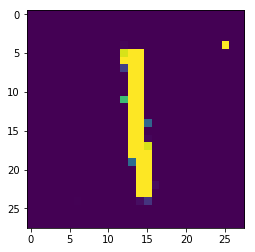

In [45]:
plt.imshow(amostras_teste[599].reshape(28,28))